In [38]:
#Importing required libraries for my project
#Statistical libraries
import pandas as pd
#linear libraries
import numpy as np
#ML lubraries
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split
#Evaluation libraries
from sklearn import metrics
import warnings 
warnings.filterwarnings("ignore")

In [9]:
#reading the dataset for my decission tree algorithm
data = pd.read_csv("heart_disease.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [12]:
#Showing the number of people with heart disease and those that do not using the target column that acts as the dependant variable.
data.target.value_counts()
#from below we can conclude that 526 people are sick (denoted by 1) and 499 people are healthy(denoted by a 0)

target
1    526
0    499
Name: count, dtype: int64

In [22]:
#Showing percentage of people who have disease basing on gender
#getting number of males
male_count=len(data[data.sex==1])
total_patients = len(data.sex)
print("There are ",((male_count/total_patients)*100),"% male patients")
#getting number of females
female_count=len(data[data.sex==0])
print("There are ",((female_count/total_patients)*100),"% female patients")

There are  69.5609756097561 % male patients
There are  30.4390243902439 % female patients


In [24]:
#Getting mean for sick and health for each column basing on target as dependant column
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [25]:
#Checking for null values in each column
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [29]:
#Selecting dependant variable
y = data.target.values
#selecting independent variables (other column other than targert)
x_data = data.drop('target',axis = 1)

In [83]:
#Splitting my data into test and train subets for training and then testing the model in the later
#Training 70% and testing 30%
X_train,X_test,y_train,y_test =train_test_split(x_data,y,test_size=0.4,random_state=52)


In [68]:
#Checking data available for training and testing after splitting
X_train.shape,X_test.shape

((717, 13), (308, 13))

# Creating the decision tree model

In [73]:
#creating a decision tree classifier
classifier = dtc(criterion="gini",max_depth=3,random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [88]:
#predicting class label of test data using the classifier above
y_predictor = classifier.predict(X_test)
print('model testing-set accuracy is :',(metrics.accuracy_score(y_test,y_predictor)*100),"%")


model testing-set accuracy is : 85.1219512195122 %


In [90]:
#predicting class label of train data using the classifier above
y_train_predictor = classifier.predict(X_train)
print('model training-set accuracy is :',(metrics.accuracy_score(y_train,y_train_predictor)*100),"%")

model training-set accuracy is : 84.39024390243902 %


# VISUALISATION

Visualising decision tree leaf nodes using matplotlib's pyplot

[Text(0.5, 0.875, 'x[11] <= 0.5\ngini = 0.5\nsamples = 615\nvalue = [298, 317]'),
 Text(0.25, 0.625, 'x[12] <= 2.5\ngini = 0.397\nsamples = 351\nvalue = [96, 255]'),
 Text(0.125, 0.375, 'x[9] <= 1.7\ngini = 0.213\nsamples = 247\nvalue = [30, 217]'),
 Text(0.0625, 0.125, 'gini = 0.15\nsamples = 220\nvalue = [18, 202]'),
 Text(0.1875, 0.125, 'gini = 0.494\nsamples = 27\nvalue = [12, 15]'),
 Text(0.375, 0.375, 'x[7] <= 152.0\ngini = 0.464\nsamples = 104\nvalue = [66, 38]'),
 Text(0.3125, 0.125, 'gini = 0.298\nsamples = 55\nvalue = [45, 10]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 49\nvalue = [21, 28]'),
 Text(0.75, 0.625, 'x[2] <= 0.5\ngini = 0.359\nsamples = 264\nvalue = [202, 62]'),
 Text(0.625, 0.375, 'x[3] <= 109.0\ngini = 0.094\nsamples = 161\nvalue = [153, 8]'),
 Text(0.5625, 0.125, 'gini = 0.463\nsamples = 11\nvalue = [7, 4]'),
 Text(0.6875, 0.125, 'gini = 0.052\nsamples = 150\nvalue = [146, 4]'),
 Text(0.875, 0.375, 'x[9] <= 1.95\ngini = 0.499\nsamples = 103\nvalue = [49, 5

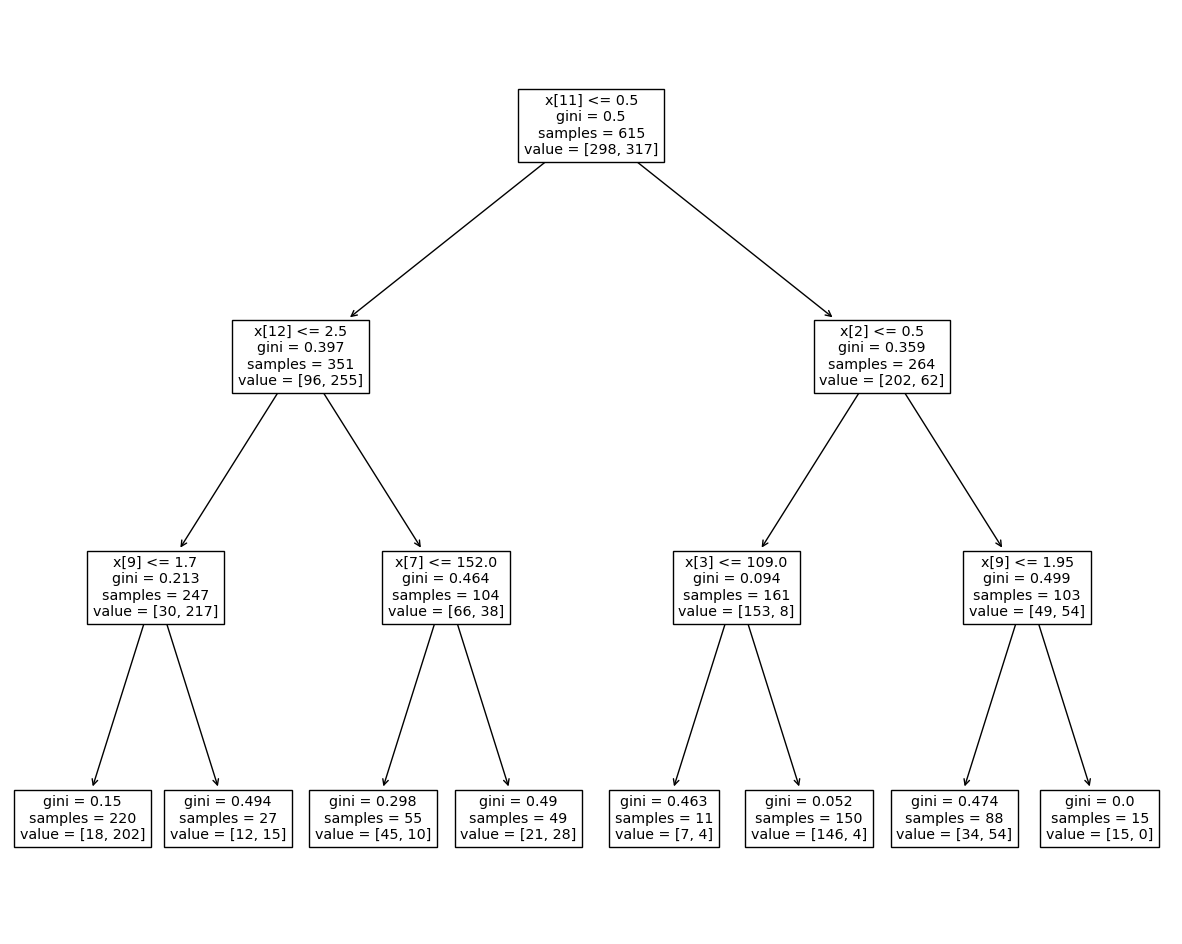

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,12)) #specifying width and height of figure
tree.plot_tree(classifier.fit(X_train,y_train))